<a href="https://colab.research.google.com/github/zainali60/deep-learning-assignmnet/blob/main/Concrete_Strength_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

**Import Libraries**

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers , optimizers

**Mount the drive**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Load the data**

In [ ]:
df= pd.read_csv("/content/gdrive/MyDrive/compresive_strength_concrete.csv")

In [ ]:
# show first 5rows
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
# shape of DataFrame
df.shape

(1030, 9)

**Check the missing values**

In [ ]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
# statistiacal decription of data
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
# to gets columns name
df.keys()

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
# split dataframe into input and output
data=df.iloc[:,:8]

targets=df.iloc[:,-1]

In [ ]:
print("shape of data =>",data.shape)
print("shape of targets =>",targets.shape)

shape of data => (1030, 8)
shape of targets => (1030,)


**plot all input variables**

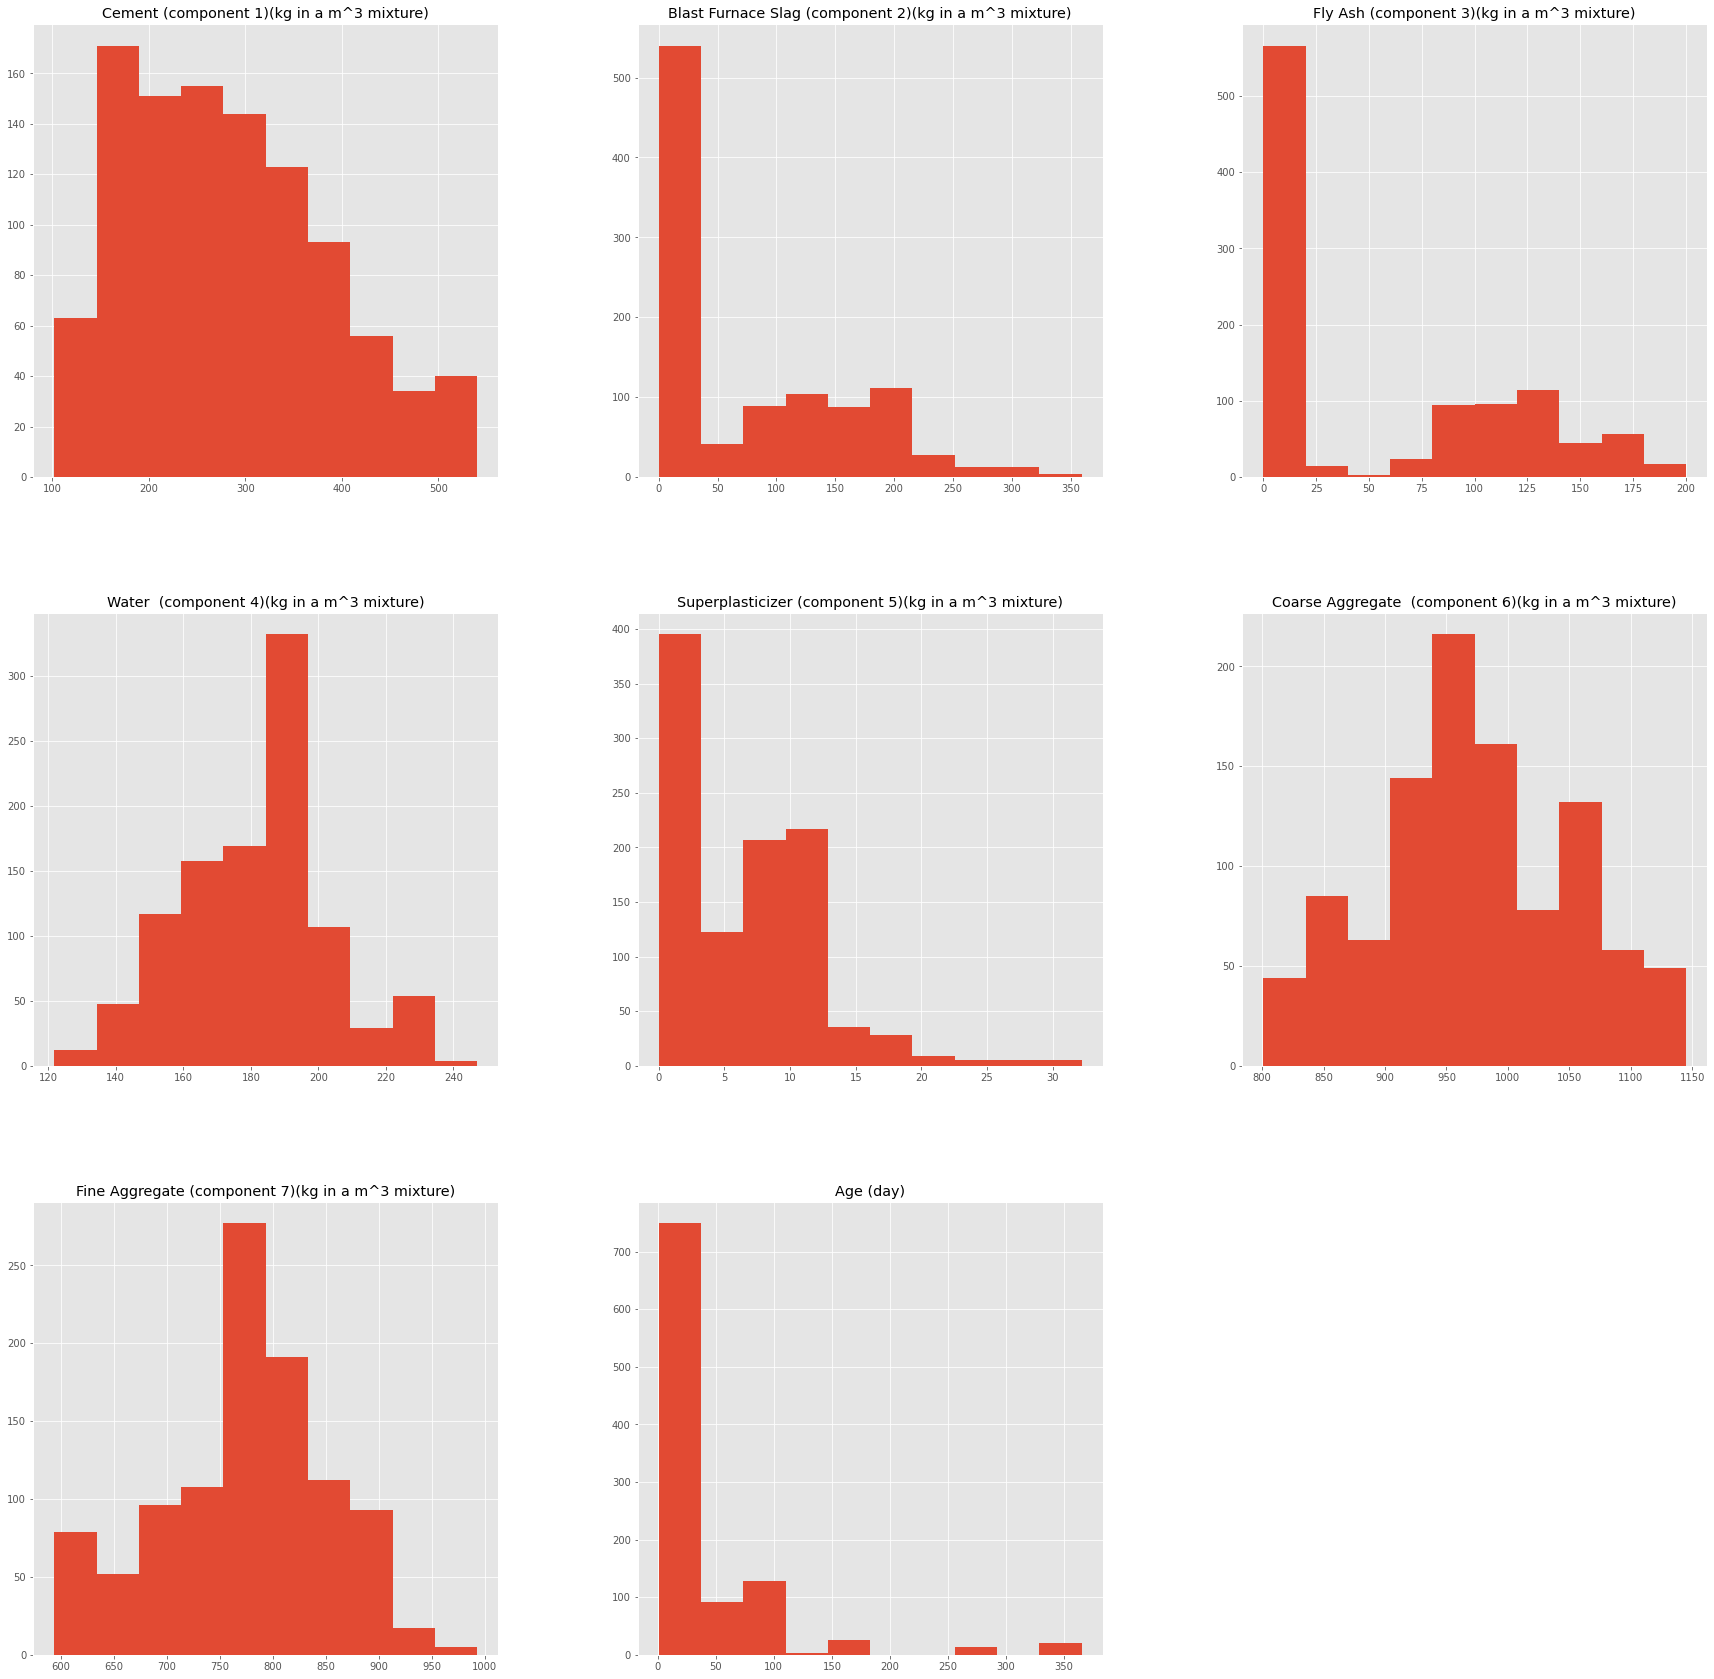

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.DataFrame.hist(data, figsize = [30,30])
plt.show()

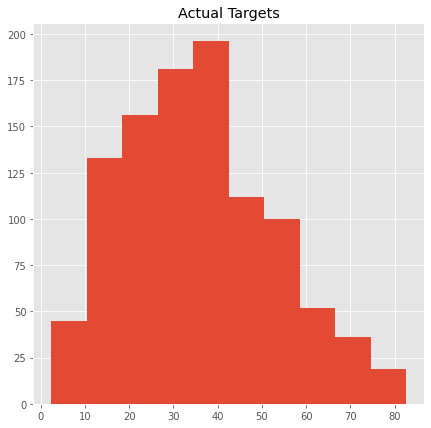

In [ ]:
# plot the target variables
plt.style.use('ggplot')
targets.hist( figsize = [7,7])
plt.title("Actual Targets")
plt.show()

In [ ]:
# standardized or normalized the data (input variables)
mean = data.mean(axis=0)
data-= mean
std = data.std(axis=0)
data/= std

In [ ]:
# data spliting using machine learning spliting method

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,targets, test_size=0.3,random_state=0)

In [ ]:
print(f"Shape of training data :{X_train.shape},\nShape of training targets:{y_train.shape}")

Shape of training data :(721, 8),
Shape of training targets:(721,)


In [ ]:
print(f"Shape of testing data :{X_test.shape},\nShape of testing targets:{y_test.shape}")

Shape of testing data :(309, 8),
Shape of testing targets:(309,)


In [ ]:
X_train= np.asarray(X_train).astype('float32')
X_test= np.asarray(X_test).astype('float32')


In [ ]:
X_train.shape

(721, 8)

In [ ]:
val_X = X_train[:210]
partial_X_train=X_train[210:]
val_y=y_train[:210]
partial_y_train=y_train[210:]


**Bilud the model**

In [ ]:
from keras import models, layers , optimizers

In [ ]:
network=models.Sequential()
network.add(tf.keras.layers.Dense(10,activation="relu",input_shape=(X_train.shape[1],)))
network.add(tf.keras.layers.Dense(8,activation="relu"))
network.add(tf.keras.layers.Dense(6,activation="relu"))
network.add(tf.keras.layers.Dense(1))


In [ ]:
# Check the model summary
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling the model
network.compile(optimizer=optimizers.RMSprop(lr=0.001), loss="mse",metrics=['mae'])

In [ ]:
history=network.fit(partial_X_train,partial_y_train,epochs=100,validation_data=(val_X,val_y),batch_size=1,verbose=1)

Epoch 1/100
511/511 [==============================] - 2s 2ms/step - loss: 1603.1957 - mae: 36.4216 - val_loss: 1339.3538 - val_mae: 32.4090
Epoch 2/100
511/511 [==============================] - 1s 1ms/step - loss: 1197.7329 - mae: 29.8289 - val_loss: 588.7391 - val_mae: 18.1620
Epoch 3/100
511/511 [==============================] - 1s 1ms/step - loss: 473.7142 - mae: 15.8825 - val_loss: 294.6623 - val_mae: 13.4973
Epoch 4/100
511/511 [==============================] - 1s 1ms/step - loss: 231.1065 - mae: 11.9483 - val_loss: 213.3809 - val_mae: 11.6496
Epoch 5/100
511/511 [==============================] - 1s 1ms/step - loss: 176.2510 - mae: 10.3959 - val_loss: 204.0080 - val_mae: 11.1833
Epoch 6/100
511/511 [==============================] - 1s 1ms/step - loss: 183.9673 - mae: 10.7422 - val_loss: 193.9268 - val_mae: 10.9406
Epoch 7/100
511/511 [==============================] - 1s 1ms/step - loss: 176.6898 - mae: 10.5036 - val_loss: 190.2110 - val_mae: 10.7945
Epoch 8/100
511/511 [===

**Trainning and validation loss**

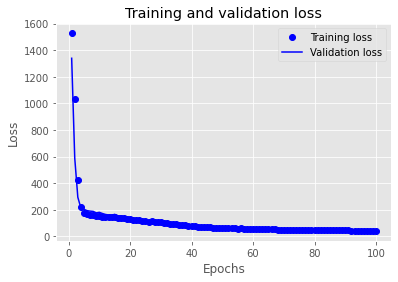

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# print absolute error
all_mae_histories=[]
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)
print(all_mae_histories)

[[32.408966064453125, 18.161964416503906, 13.497333526611328, 11.649589538574219, 11.183330535888672, 10.940583229064941, 10.794525146484375, 10.714701652526855, 10.572420120239258, 10.511296272277832, 10.296149253845215, 10.185892105102539, 10.085926055908203, 9.937700271606445, 9.989577293395996, 9.75202751159668, 9.675631523132324, 9.499625205993652, 9.405844688415527, 9.232797622680664, 9.102399826049805, 8.993611335754395, 8.863128662109375, 8.749547958374023, 8.596896171569824, 8.523128509521484, 8.423995971679688, 8.292031288146973, 8.183117866516113, 8.083006858825684, 8.024477005004883, 7.860402584075928, 7.7602410316467285, 7.648960590362549, 7.521991729736328, 7.488801002502441, 7.301948547363281, 7.196631908416748, 7.154510974884033, 6.99159049987793, 6.940885543823242, 6.748144149780273, 6.74947452545166, 6.6566162109375, 6.416769027709961, 6.38834285736084, 6.467083930969238, 6.266656875610352, 6.255955696105957, 6.121677875518799, 6.1590046882629395, 6.45810079574585, 5.

In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(100)]
print(average_mae_history)

[32.408966064453125, 18.161964416503906, 13.497333526611328, 11.649589538574219, 11.183330535888672, 10.940583229064941, 10.794525146484375, 10.714701652526855, 10.572420120239258, 10.511296272277832, 10.296149253845215, 10.185892105102539, 10.085926055908203, 9.937700271606445, 9.989577293395996, 9.75202751159668, 9.675631523132324, 9.499625205993652, 9.405844688415527, 9.232797622680664, 9.102399826049805, 8.993611335754395, 8.863128662109375, 8.749547958374023, 8.596896171569824, 8.523128509521484, 8.423995971679688, 8.292031288146973, 8.183117866516113, 8.083006858825684, 8.024477005004883, 7.860402584075928, 7.7602410316467285, 7.648960590362549, 7.521991729736328, 7.488801002502441, 7.301948547363281, 7.196631908416748, 7.154510974884033, 6.99159049987793, 6.940885543823242, 6.748144149780273, 6.74947452545166, 6.6566162109375, 6.416769027709961, 6.38834285736084, 6.467083930969238, 6.266656875610352, 6.255955696105957, 6.121677875518799, 6.1590046882629395, 6.45810079574585, 5.9

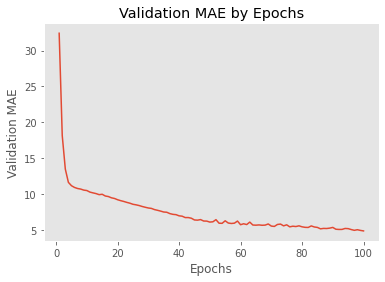

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.title('Validation MAE by Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.grid()
plt.show()

**Model evaluation**

In [ ]:
test_mse_score, test_mae_score = network.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 45.1174 - mae: 5.0201


In [ ]:
 print(f"test mae score is :{ test_mae_score} ,\ntest mse score is :{test_mse_score}" )

test mae score is :5.02012825012207 ,
test mse score is :45.117366790771484


**Prediction the model**

In [ ]:

y_pred = network.predict(X_test)
y_pred

array([[31.107557 ],
       [10.536798 ],
       [77.46446  ],
       [59.145256 ],
       [13.300917 ],
       [52.512047 ],
       [58.33465  ],
       [18.32337  ],
       [66.832245 ],
       [43.882042 ],
       [19.132614 ],
       [56.283775 ],
       [40.81167  ],
       [17.747087 ],
       [62.527107 ],
       [67.74987  ],
       [32.10647  ],
       [36.370396 ],
       [47.546917 ],
       [38.75306  ],
       [61.182816 ],
       [28.169083 ],
       [26.864155 ],
       [44.292446 ],
       [16.191349 ],
       [26.950006 ],
       [56.71386  ],
       [19.225096 ],
       [67.74987  ],
       [63.287567 ],
       [21.483564 ],
       [45.907616 ],
       [25.32934  ],
       [30.874607 ],
       [17.471128 ],
       [ 6.3904753],
       [49.484745 ],
       [23.244808 ],
       [28.524693 ],
       [24.871801 ],
       [50.718426 ],
       [41.29095  ],
       [28.255608 ],
       [32.791855 ],
       [59.59     ],
       [42.303482 ],
       [24.949835 ],
       [37.68

In [ ]:
# actual targets
y_test

747    26.06
718    10.35
175    79.30
828    74.99
713     9.69
       ...  
156    72.99
222    28.63
665    11.39
210    20.08
306    48.28
Name: Concrete compressive strength(MPa, megapascals) , Length: 309, dtype: float64

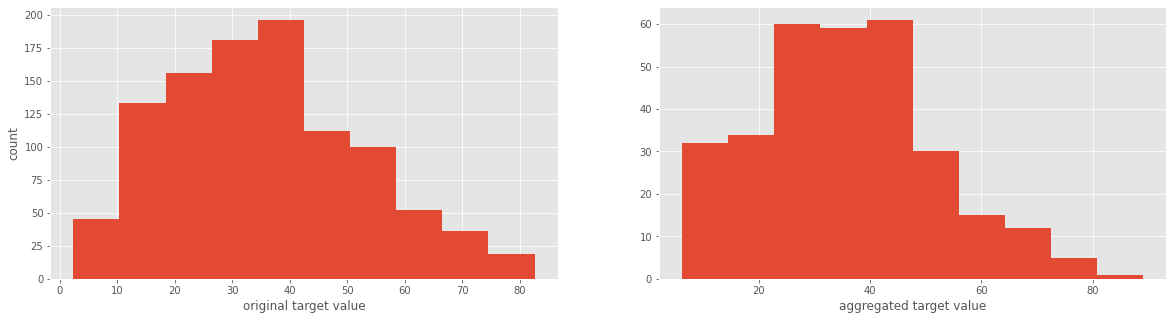

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(targets)
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(y_pred)
plt.xlabel('aggregated target value')
plt.show()